# Remember to comment code

In [38]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
# read in data
data = pd.read_csv('../Data/Data Cleaning and Feature Eng/recent-grads-new-features.csv')
data.head()

# encode categorical column to numerical value
le = LabelEncoder()
data["Major_category_coded"] = le.fit_transform(data["Major_category"])

# encode predicted class variable as numerical label
le = LabelEncoder()
data["Median_category_coded"] = le.fit_transform(data["Median_category"])

data.describe()

,Unnamed: 0,Rank,Major_code,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,...,Major_category_Health,Major_category_Humanities & Liberal Arts,Major_category_Industrial Arts & Consumer Services,Major_category_Interdisciplinary,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science,Major_category_coded,Median_category_coded
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000
mean,86.075581,87.075581,3880.273256,39394.715116,358.127907,16723.877907,22653.656977,0.523090,31374.116279,26179.994186,...,0.069767,0.087209,0.034884,0.005814,0.029070,0.05814,0.052326,0.052326,6.965116,2.604651
std,50.221266,50.221266,1692.670105,63468.993551,619.578329,28122.182046,41053.785020,0.231135,50766.623538,42948.847324,...,0.255498,0.282965,0.184021,0.076249,0.168493,0.23469,0.223333,0.223333,4.241118,1.116375
min,0.000000,1.000000,1100.000000,609.000000,2.000000,119.000000,0.000000,0.000000,559.000000,488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,42.750000,43.750000,2402.750000,4559.750000,42.000000,2177.500000,1851.500000,0.336026,3734.750000,3181.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3.000000,2.000000
50%,86.500000,87.500000,3607.500000,15104.000000,131.000000,5434.000000,8386.500000,0.539560,12031.500000,10073.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,7.000000,2.000000
75%,129.250000,130.250000,5503.250000,38909.750000,339.000000,14631.000000,22553.750000,0.703299,31701.250000,25447.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,9.000000,3.000000
max,172.000000,173.000000,6403.000000,393735.000000,4212.000000,173809.000000,307087.000000,0.968954,307933.000000,251540.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,15.000000,6.000000


In [40]:
data.columns

Index(['Unnamed: 0', 'Rank', 'Major_code', 'Major', 'Major_category', 'Total',
       'Sample_size', 'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'Median', 'P25th', 'P75th', 'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs', 'Median_category', 'Num_majors', 'Percent_sample_size',
       'Percent_employed', 'Percent_unemployed', 'Percent_college',
       'Percent_non_college', 'Percent_low_wage', 'Percent_full_time',
       'Percent_part_time', 'Major_category_Agriculture & Natural Resources',
       'Major_category_Arts', 'Major_category_Biology & Life Science',
       'Major_category_Business', 'Major_category_Communications & Journalism',
       'Major_category_Computers & Mathematics', 'Major_category_Education',
       'Major_category_Engineering', 'Major_category_Health',
       'Major_category_Humanities & Liberal Arts',
       'Major_category_Industrial Arts & Consumer Servic

In [453]:
# split into train and test set
train, test = train_test_split(data,test_size=0.2, random_state=42)

## Experiment 1: All features

In [273]:
# include all features not directly related to median (ie. P25th, P75th, median)

features = ['Major_category_coded', 'Total',
       'Sample_size', 'Men', 'Women', 'ShareWomen', 'Employed', 'Full_time',
       'Part_time', 'Full_time_year_round', 'Unemployed', 'Unemployment_rate',
       'College_jobs', 'Non_college_jobs',
       'Low_wage_jobs', 'Num_majors', 'Percent_sample_size',
       'Percent_employed', 'Percent_unemployed', 'Percent_college',
       'Percent_non_college', 'Percent_low_wage', 'Percent_full_time']

c = DecisionTreeClassifier()
X_train = train[features]
y_train = train['Median_category_coded']

X_test = test[features]
y_test = test['Median_category_coded']
c.fit(X_train,y_train)

# generate training set accuracy
y_pred = c.predict(X_train)
score = accuracy_score(y_train,y_pred)*100
print("Training Accuracy:", score)

# generate test set accuracy
y_pred = c.predict(X_test)
score = accuracy_score(y_test,y_pred)*100
print("Test Accuracy:", score)

Training Accuracy: 100.0
Test Accuracy: 54.285714285714285


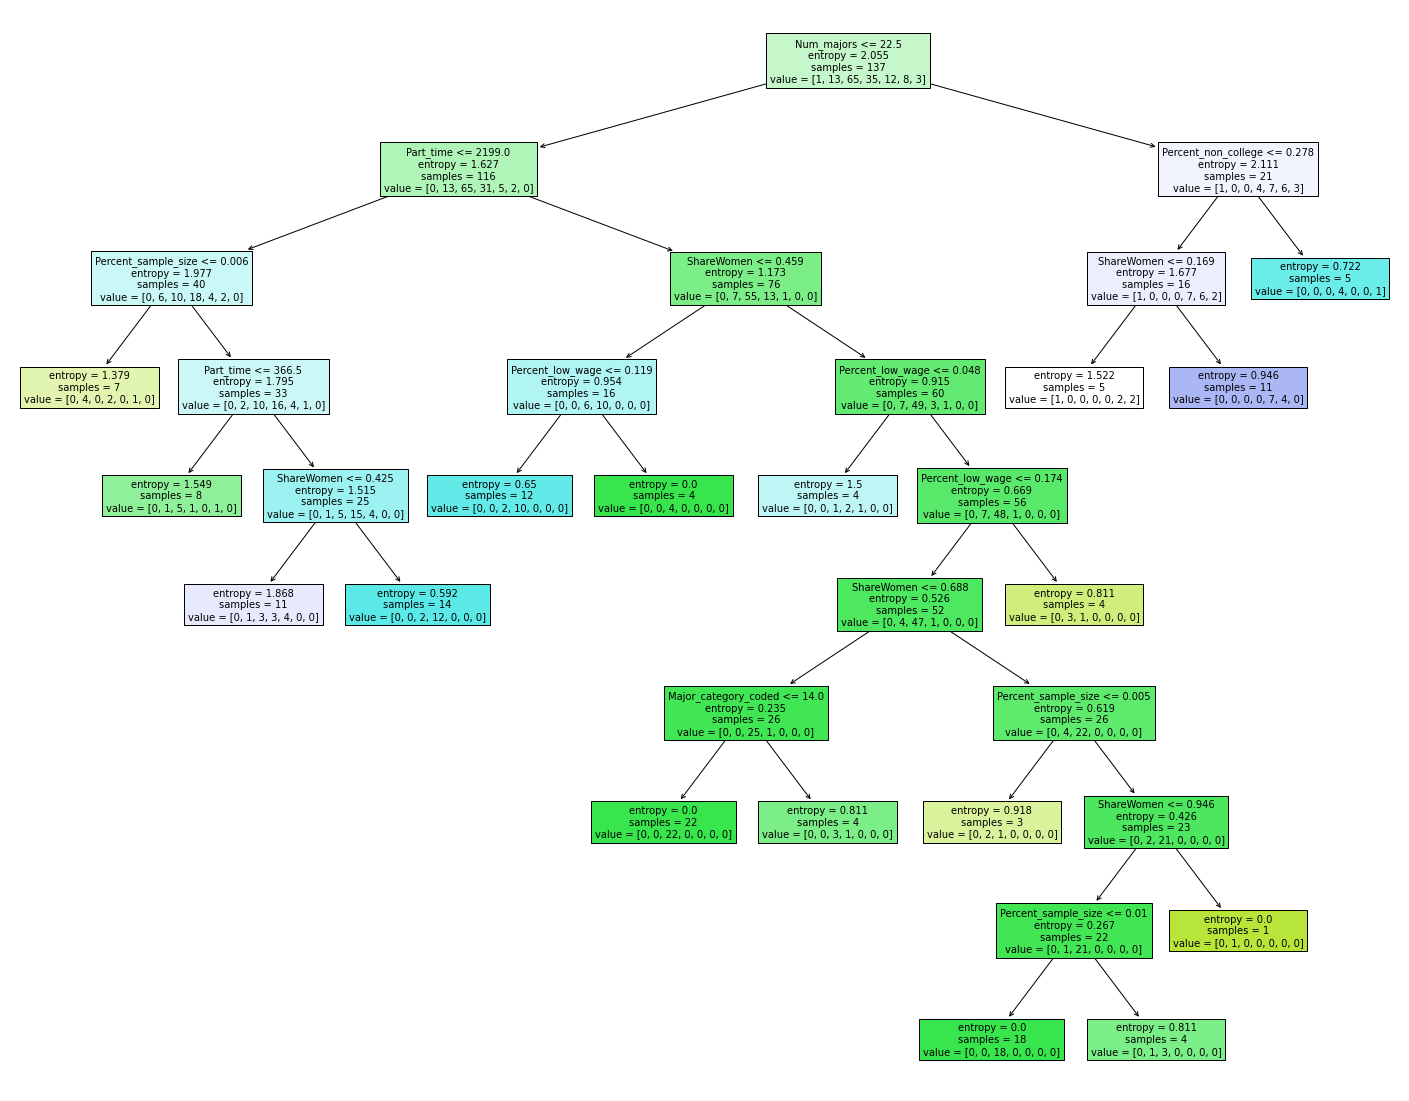

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(c, 
                   feature_names=X_train.columns,  
#                    class_names=iris.target_names,
                   filled=True)
fig.savefig("exp1_decision_tree.png")

## Experiment 2: Reduced feature set

In [455]:
# include only features that improve the model
features = ['Major_category_coded',
            'Num_majors',
            'Percent_full_time',
            'Percent_college',
            'Percent_non_college',
            'Percent_sample_size',
            'Percent_low_wage',
            'Percent_unemployed',
            'ShareWomen',
            'Part_time',
            ]

X_train = train[features]
y_train = train['Median_category_coded']

X_test = test[features]
y_test = test['Median_category_coded']

# refit the classifier on the training set with fewer features
c.fit(X_train,y_train)

# generate training set accuracy
y_pred = c.predict(X_train)
score = accuracy_score(y_train,y_pred)*100
print("Training Accuracy:", score)

# generate test set accuracy 
y_pred = c.predict(X_test)
score = accuracy_score(y_test,y_pred)*100
print("Test Accuracy: ", score )



Training Accuracy: 100.0
Test Accuracy:  65.71428571428571


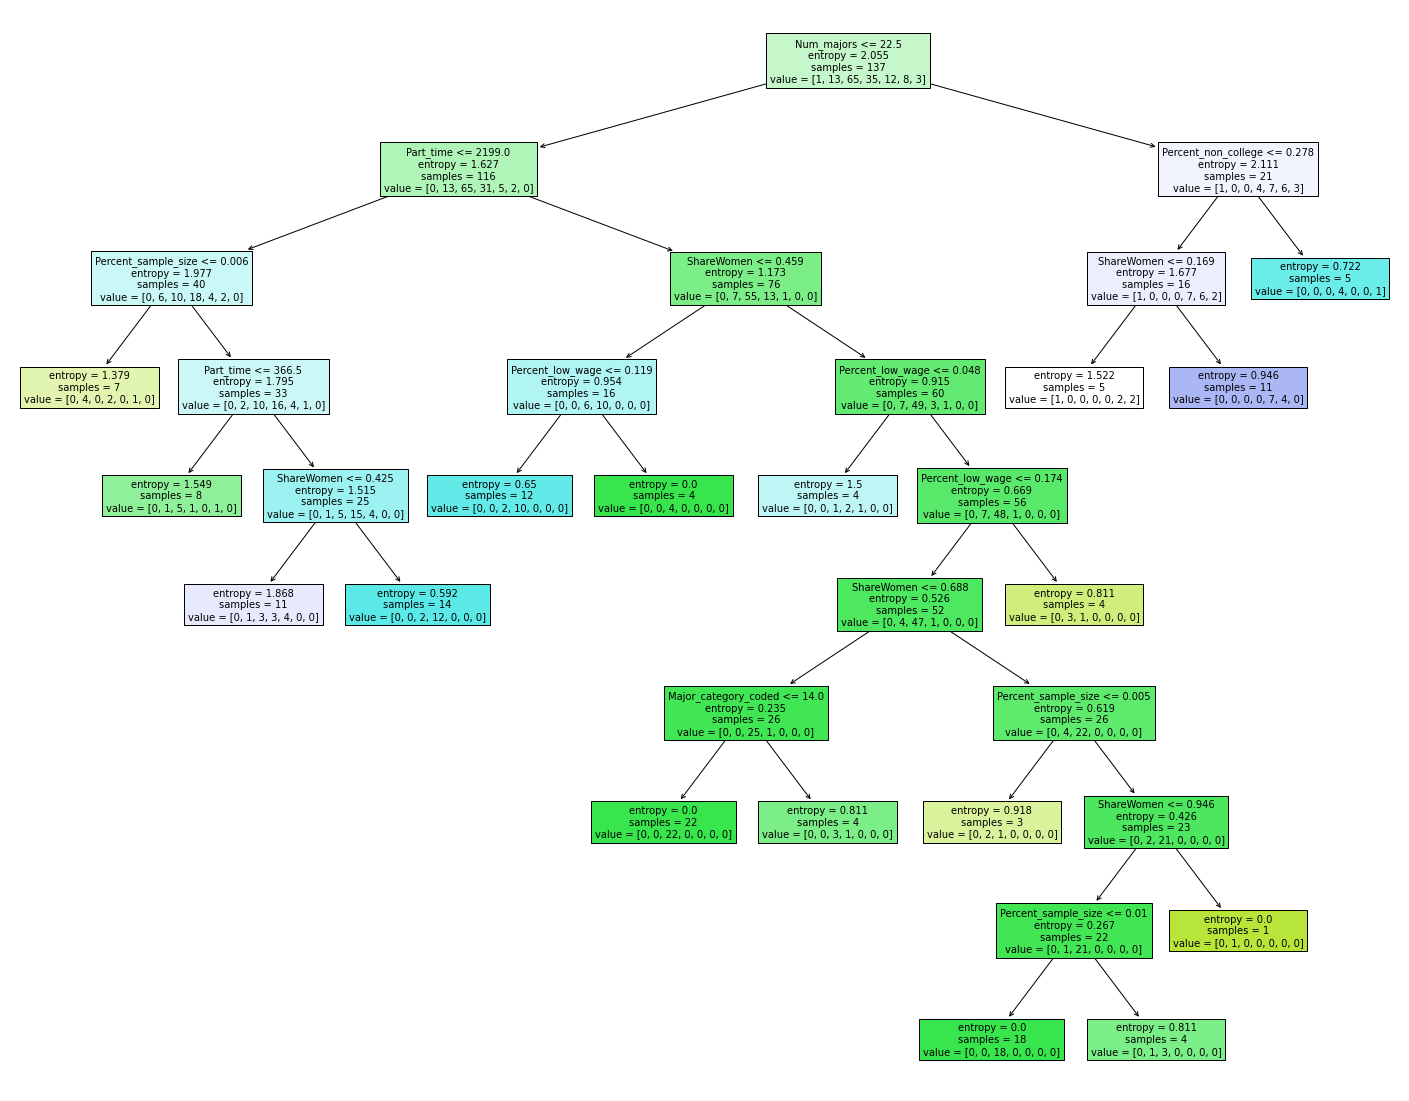

In [465]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(c, 
                   feature_names=X_train.columns,  
#                    class_names=iris.target_names,
                   filled=True)
fig.savefig("exp2_decision_tree.png")

## Experiment 3: Tuning parameters

In [462]:
MIN_SAMPLES_SPLIT = 15
CRITERION='entropy'

c = DecisionTreeClassifier(min_samples_split=MIN_SAMPLES_SPLIT, criterion=CRITERION)

# using the same feature set as Experiment 2
c.fit(X_train,y_train)
y_pred = c.predict(X_test)
score = accuracy_score(y_test,y_pred)*100
print("Test Accuracy: ", score )

Test Accuracy:  74.28571428571429


In [470]:
# Code used to test different parameter values

PARAMS = list(range(2, 60, 2))
ACCURACY_SCORES_GINI = []
ACCURACY_SCORES_ENTROPY = []

for param in PARAMS:
    c = DecisionTreeClassifier(min_samples_split=param, criterion='gini')
    c.fit(X_train,y_train)
    y_pred = c.predict(X_test)
    score = accuracy_score(y_test,y_pred)*100
    print("Test Accuracy using gini, ", param, ": ", score )
#     print("Training accuracy using gini,", sample, ": ", accuracy_score(y_train, c.predict(X_train)))

    ACCURACY_SCORES_GINI.append(score)
    
for param in PARAMS:
    c = DecisionTreeClassifier(min_samples_split=param, criterion='entropy')
    c.fit(X_train,y_train)
    y_pred = c.predict(X_test)
    score = accuracy_score(y_test,y_pred)*100
    print("Test Accuracy using entropy,", param, ": ", score )
#     print("Training accuracy using entropy,", sample, ": ", accuracy_score(y_train, c.predict(X_train)))
    ACCURACY_SCORES_ENTROPY.append(score)

Test Accuracy using gini,  2 :  65.71428571428571
Test Accuracy using gini,  4 :  62.857142857142854
Test Accuracy using gini,  6 :  65.71428571428571
Test Accuracy using gini,  8 :  62.857142857142854
Test Accuracy using gini,  10 :  65.71428571428571
Test Accuracy using gini,  12 :  65.71428571428571
Test Accuracy using gini,  14 :  62.857142857142854
Test Accuracy using gini,  16 :  62.857142857142854
Test Accuracy using gini,  18 :  62.857142857142854
Test Accuracy using gini,  20 :  57.14285714285714
Test Accuracy using gini,  22 :  57.14285714285714
Test Accuracy using gini,  24 :  57.14285714285714
Test Accuracy using gini,  26 :  54.285714285714285
Test Accuracy using gini,  28 :  54.285714285714285
Test Accuracy using gini,  30 :  54.285714285714285
Test Accuracy using gini,  32 :  54.285714285714285
Test Accuracy using gini,  34 :  51.42857142857142
Test Accuracy using gini,  36 :  51.42857142857142
Test Accuracy using gini,  38 :  51.42857142857142
Test Accuracy using gini, 

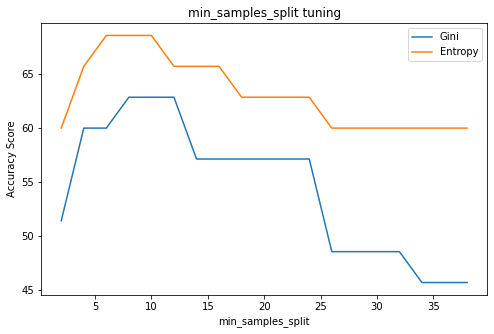

In [34]:
# generate tuning plot

plt.figure(num = 3, figsize=(8, 5))  
plt.plot(PARAMS, ACCURACY_SCORES_GINI, label="Gini")
plt.plot(PARAMS, ACCURACY_SCORES_ENTROPY, label="Entropy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy Score")
plt.title("min_samples_split tuning")
plt.legend(loc="upper right")

plt.show()

,Major_category_coded,Total,Sample_size,Men,Women,ShareWomen,Employed,Full_time,Part_time,Full_time_year_round,...,Non_college_jobs,Low_wage_jobs,Num_majors,Percent_sample_size,Percent_employed,Percent_unemployed,Percent_college,Percent_non_college,Percent_low_wage,Percent_full_time
101,15,19879,214,8422,13638,0.618223,16181,13616,4543,10548,...,10605,1895,9.0,0.010765,0.813975,0.087680,0.169677,0.533478,0.095327,0.684944
56,15,28187,219,10345,17842,0.632987,21190,18681,5563,13583,...,9570,2499,9.0,0.007770,0.751765,0.080569,0.240324,0.339518,0.088658,0.662752
42,5,36698,425,515,1247,0.707719,28459,26348,4332,21130,...,11783,1672,11.0,0.011581,0.775492,0.079950,0.363617,0.321080,0.045561,0.717968
82,2,1329,9,626,703,0.528969,1010,946,169,740,...,184,56,14.0,0.006772,0.759970,0.000000,0.509406,0.138450,0.042137,0.711813
65,7,8804,125,124,0,0.000000,7502,7001,1240,5825,...,3896,386,29.0,0.014198,0.852113,0.047251,0.277828,0.442526,0.043844,0.795207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,2439,44,10624,15270,0.589712,2174,1819,620,1528,...,893,94,10.0,0.018040,0.891349,0.074621,0.219352,0.366134,0.038540,0.745797
106,0,13773,152,27015,35037,0.564639,11797,10722,2613,6954,...,5808,1405,10.0,0.011036,0.856531,0.061134,0.314601,0.421695,0.102011,0.778480
14,7,4321,30,3526,795,0.183985,3608,2999,811,2004,...,947,263,29.0,0.006943,0.834992,0.005323,0.564453,0.219162,0.060866,0.694052
92,4,213996,2394,476,209,0.305109,179633,147335,49889,116251,...,97964,27440,4.0,0.011187,0.839422,0.068235,0.190485,0.457784,0.128227,0.688494


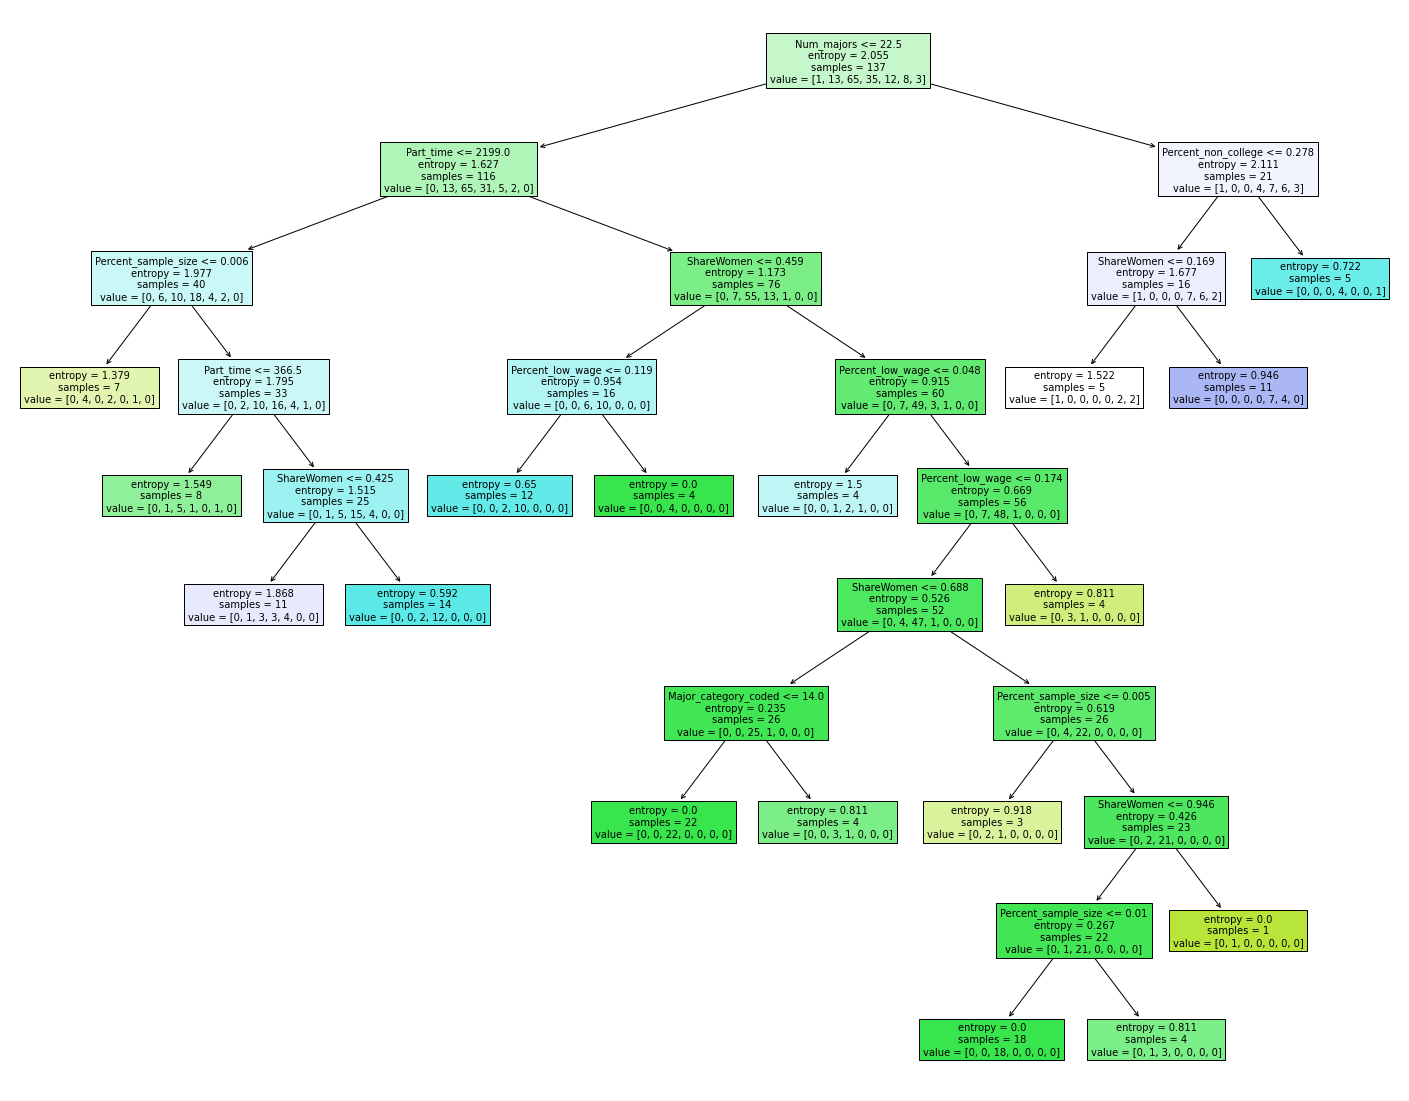

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(c, 
                   feature_names=X_train.columns,  
#                    class_names=iris.target_names,
                   filled=True)
fig.savefig("exp3_decision_tree.png")

In [468]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = {'min_samples_split': list(range(2, 50))}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/home/awjian/.local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, 31, ...]},
             verbose=1)

In [469]:
grid_search_cv.best_estimator_


DecisionTreeClassifier(min_samples_split=44, random_state=42)